In [1]:
from __future__ import absolute_import, division, print_function

In [2]:
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("../mnist-data/", one_hot=True)

Extracting ../mnist-data/train-images-idx3-ubyte.gz
Extracting ../mnist-data/train-labels-idx1-ubyte.gz
Extracting ../mnist-data/t10k-images-idx3-ubyte.gz
Extracting ../mnist-data/t10k-labels-idx1-ubyte.gz


In [4]:
mnist.train.images.shape

(55000, 784)

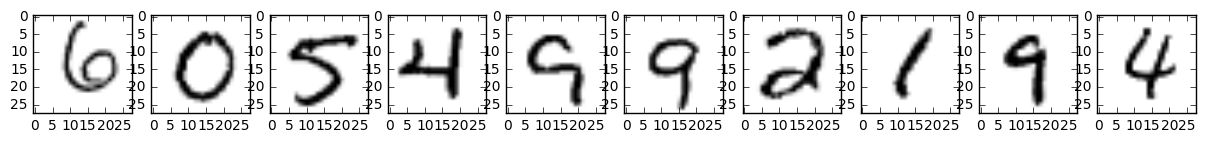

In [5]:
plt.figure(figsize=(15,5))
for i in list(range(10)):
    plt.subplot(1, 10, i+1)
    pixels = mnist.test.images[i+100]
    pixels = pixels.reshape((28, 28))
    plt.imshow(pixels, cmap='gray_r')
plt.show()

In [6]:
import tensorflow as tf
import tensorlayer as tl

In [7]:
# Set parameters
training_iteration = 10
batch_size = 250
display_step = 5

FLAGS = None

In [8]:
# TF graph input
x = tf.placeholder('float', [None, 784]) # mnist data image of shape 28*28=784
y = tf.placeholder('float', [None,10]) # 0-9 digits recognition => 10 classes

In [9]:
network = tl.layers.InputLayer(x, name='input_layer')
network = tl.layers.DenseLayer(network, n_units=512,act = tf.nn.relu, name='relu1')
network = tl.layers.DropoutLayer(network, keep=0.75, name='drop1')
network = tl.layers.DenseLayer(network, n_units=512,act = tf.nn.relu, name='relu2')
network = tl.layers.DropoutLayer(network, keep=0.75, name='drop2')
network = tl.layers.DenseLayer(network, n_units=10,act = tf.nn.softmax, name='output_layer')

y_hat = network.outputs

  tensorlayer:Instantiate InputLayer  input_layer: (?, 784)
  tensorlayer:Instantiate DenseLayer  relu1: 512, relu
  tensorlayer:Instantiate DropoutLayer drop1: keep: 0.750000
  tensorlayer:Instantiate DenseLayer  relu2: 512, relu
  tensorlayer:Instantiate DropoutLayer drop2: keep: 0.750000
  tensorlayer:Instantiate DenseLayer  output_layer: 10, softmax


In [10]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y_hat,y))

In [11]:
train_params = network.all_params
with tf.name_scope("train") as scope:
    # Gradient descent
    optimizer = tf.train.AdamOptimizer()
    learn     = optimizer.minimize(cost, var_list=train_params)

In [12]:
# Initializing the variables
init = tf.initialize_all_variables()

# Merge all summaries into a single operator
merged_summary_op = tf.merge_all_summaries()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [13]:
# Launch the graph
sess = tf.InteractiveSession()
sess.run(init)

In [14]:
# Test the model, Calculate accuracy
prediction = tf.equal(tf.argmax(y_hat, 1), tf.argmax(y, 1))
acc = tf.reduce_mean(tf.cast(prediction, tf.float32))

In [15]:
# train the network
tl.utils.fit(sess, network, learn, cost, mnist.train.images, mnist.train.labels, x, y,
             acc=acc, batch_size=batch_size, n_epoch=training_iteration, print_freq=display_step, 
             X_val=mnist.test.images, y_val=mnist.test.labels, eval_train=False)


Start training the network ...
Epoch 1 of 10 took 3.282138s
   val loss: 1.602044
   val acc: 0.860700
Epoch 5 of 10 took 3.814862s
   val loss: 1.488521
   val acc: 0.973200
Epoch 10 of 10 took 4.026843s
   val loss: 1.483641
   val acc: 0.978000
Total training time: 36.598571s


In [16]:
# evaluation
tl.utils.test(sess, network, acc, mnist.test.images, mnist.test.labels, x, y, batch_size=None)

Start testing the network ...
   test acc: 0.978000


In [17]:
dp_dict = tl.utils.dict_to_one( network.all_drop )
dp_dict

{<tf.Tensor 'Placeholder_2:0' shape=<unknown> dtype=float32>: 1,
 <tf.Tensor 'Placeholder_3:0' shape=<unknown> dtype=float32>: 1}

In [18]:
# test item #100 is a "six"
pixels = mnist.test.images[100]

feed_dict = {x:[pixels]}
feed_dict.update(dp_dict)

result = sess.run(y_hat, feed_dict=feed_dict)
dict(zip(range(10), result[0]))

{0: 4.567826e-11,
 1: 1.1894405e-11,
 2: 2.392208e-12,
 3: 9.1619344e-15,
 4: 3.232004e-13,
 5: 1.5945956e-10,
 6: 1.0,
 7: 3.1928547e-15,
 8: 2.354203e-13,
 9: 6.0407816e-17}

In [19]:
def test_render(pixels, result, truth):
    #pixels, result and truth are np vectors
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    pixels = pixels.reshape((28, 28))
    plt.imshow(pixels, cmap='gray_r')

    plt.subplot(1, 2, 2)
    
    #index, witdh
    ind = np.arange(len(result))
    width = 0.4

    plt.barh(ind,result, width, color='gray')
    plt.barh(ind+width,truth,width, color='green')
    plt.yticks(ind+width, range(10))
    plt.margins(y=0)

    plt.show()

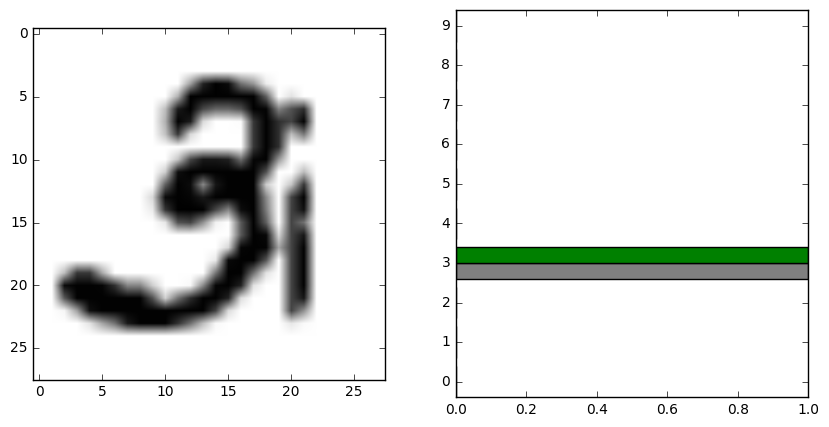

In [20]:
import random
i = random.randint(0,mnist.test.images.shape[0])

pixels = mnist.test.images[i]
truth  = mnist.test.labels[i]

feed_dict = {x:[pixels]}
feed_dict.update(dp_dict)
result = sess.run(y_hat, feed_dict=feed_dict)[0]

test_render(pixels, result, truth)

In [21]:
### What went wrong?
pixels = mnist.test.images
truth = mnist.test.labels

feed_dict = {x:pixels}
feed_dict.update(dp_dict)
result = sess.run(y_hat, feed_dict=feed_dict)

result

array([[  1.53869846e-26,   6.08810861e-26,   3.05940142e-19, ...,
          1.00000000e+00,   3.22131893e-25,   4.71262786e-18],
       [  2.30056344e-20,   5.08913806e-17,   1.00000000e+00, ...,
          3.56644878e-26,   9.09189108e-21,   6.43010809e-32],
       [  5.84816009e-14,   1.00000000e+00,   3.43344450e-12, ...,
          6.74483733e-11,   6.20399218e-12,   1.19873945e-15],
       ..., 
       [  1.79824753e-27,   5.59178739e-21,   3.75450952e-27, ...,
          1.69024608e-18,   3.23368844e-20,   3.38731159e-13],
       [  5.26084440e-19,   1.63357480e-18,   1.50598891e-24, ...,
          8.18150450e-21,   1.36118666e-12,   5.51124545e-23],
       [  6.55506845e-13,   9.64819848e-19,   1.33456415e-15, ...,
          4.69479326e-25,   5.14604445e-17,   1.93890893e-21]], dtype=float32)

In [22]:
acc = result.argmax(axis=1) == truth.argmax(axis=1)
incorrect = np.argwhere(acc==False).flatten()

print("Incorrect predictions: {}".format(len(incorrect)))

Incorrect predictions: 220


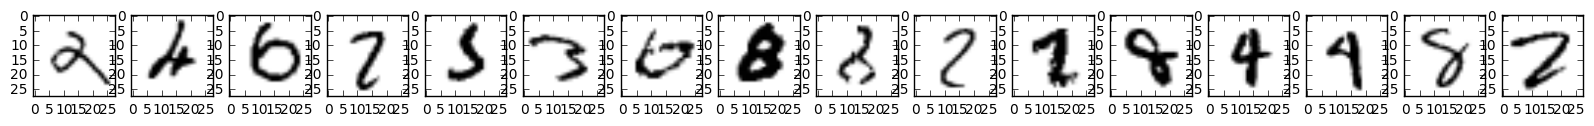

In [23]:
plt.figure(figsize=(20,5))
plt_idx = 1
for i in list(incorrect[:16]):
    plt.subplot(1, 16, plt_idx)
    pixels = mnist.test.images[i]
    pixels = pixels.reshape((28, 28))
    plt.imshow(pixels, cmap='gray_r')
    plt_idx += 1
plt.show()

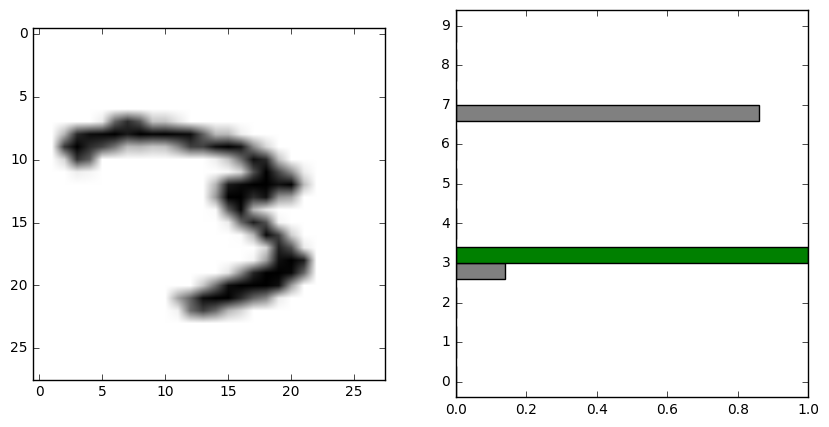

In [24]:
i = random.choice(list(incorrect))

pixels = mnist.test.images[i]
truth  = mnist.test.labels[i]

feed_dict = {x:[pixels]}
feed_dict.update(dp_dict)
result = sess.run(y_hat, feed_dict=feed_dict)[0]

test_render(pixels, result, truth)

In [25]:
# Close the Session when we're done.
# sess.close()